In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [3]:
# the supplied CSV data file is the raw_data directory
bc_data = pd.read_csv('/Users/angelique/Documents/GitHub/Capstone-2---Breast-Cancer-Tumor-Predictions/data.csv')

bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
bc_data = bc_data.drop('id', axis=1)
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
bc_data = bc_data.drop('Unnamed: 32', axis=1)
bc_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
b_df = bc_data[bc_data['diagnosis'] == 'B']
m_df = bc_data[bc_data['diagnosis'] == 'M']

In [11]:
b_df = b_df.drop('diagnosis', axis=1)
m_df = m_df.drop('diagnosis', axis=1)

In [13]:
b_df.head(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [15]:
m_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

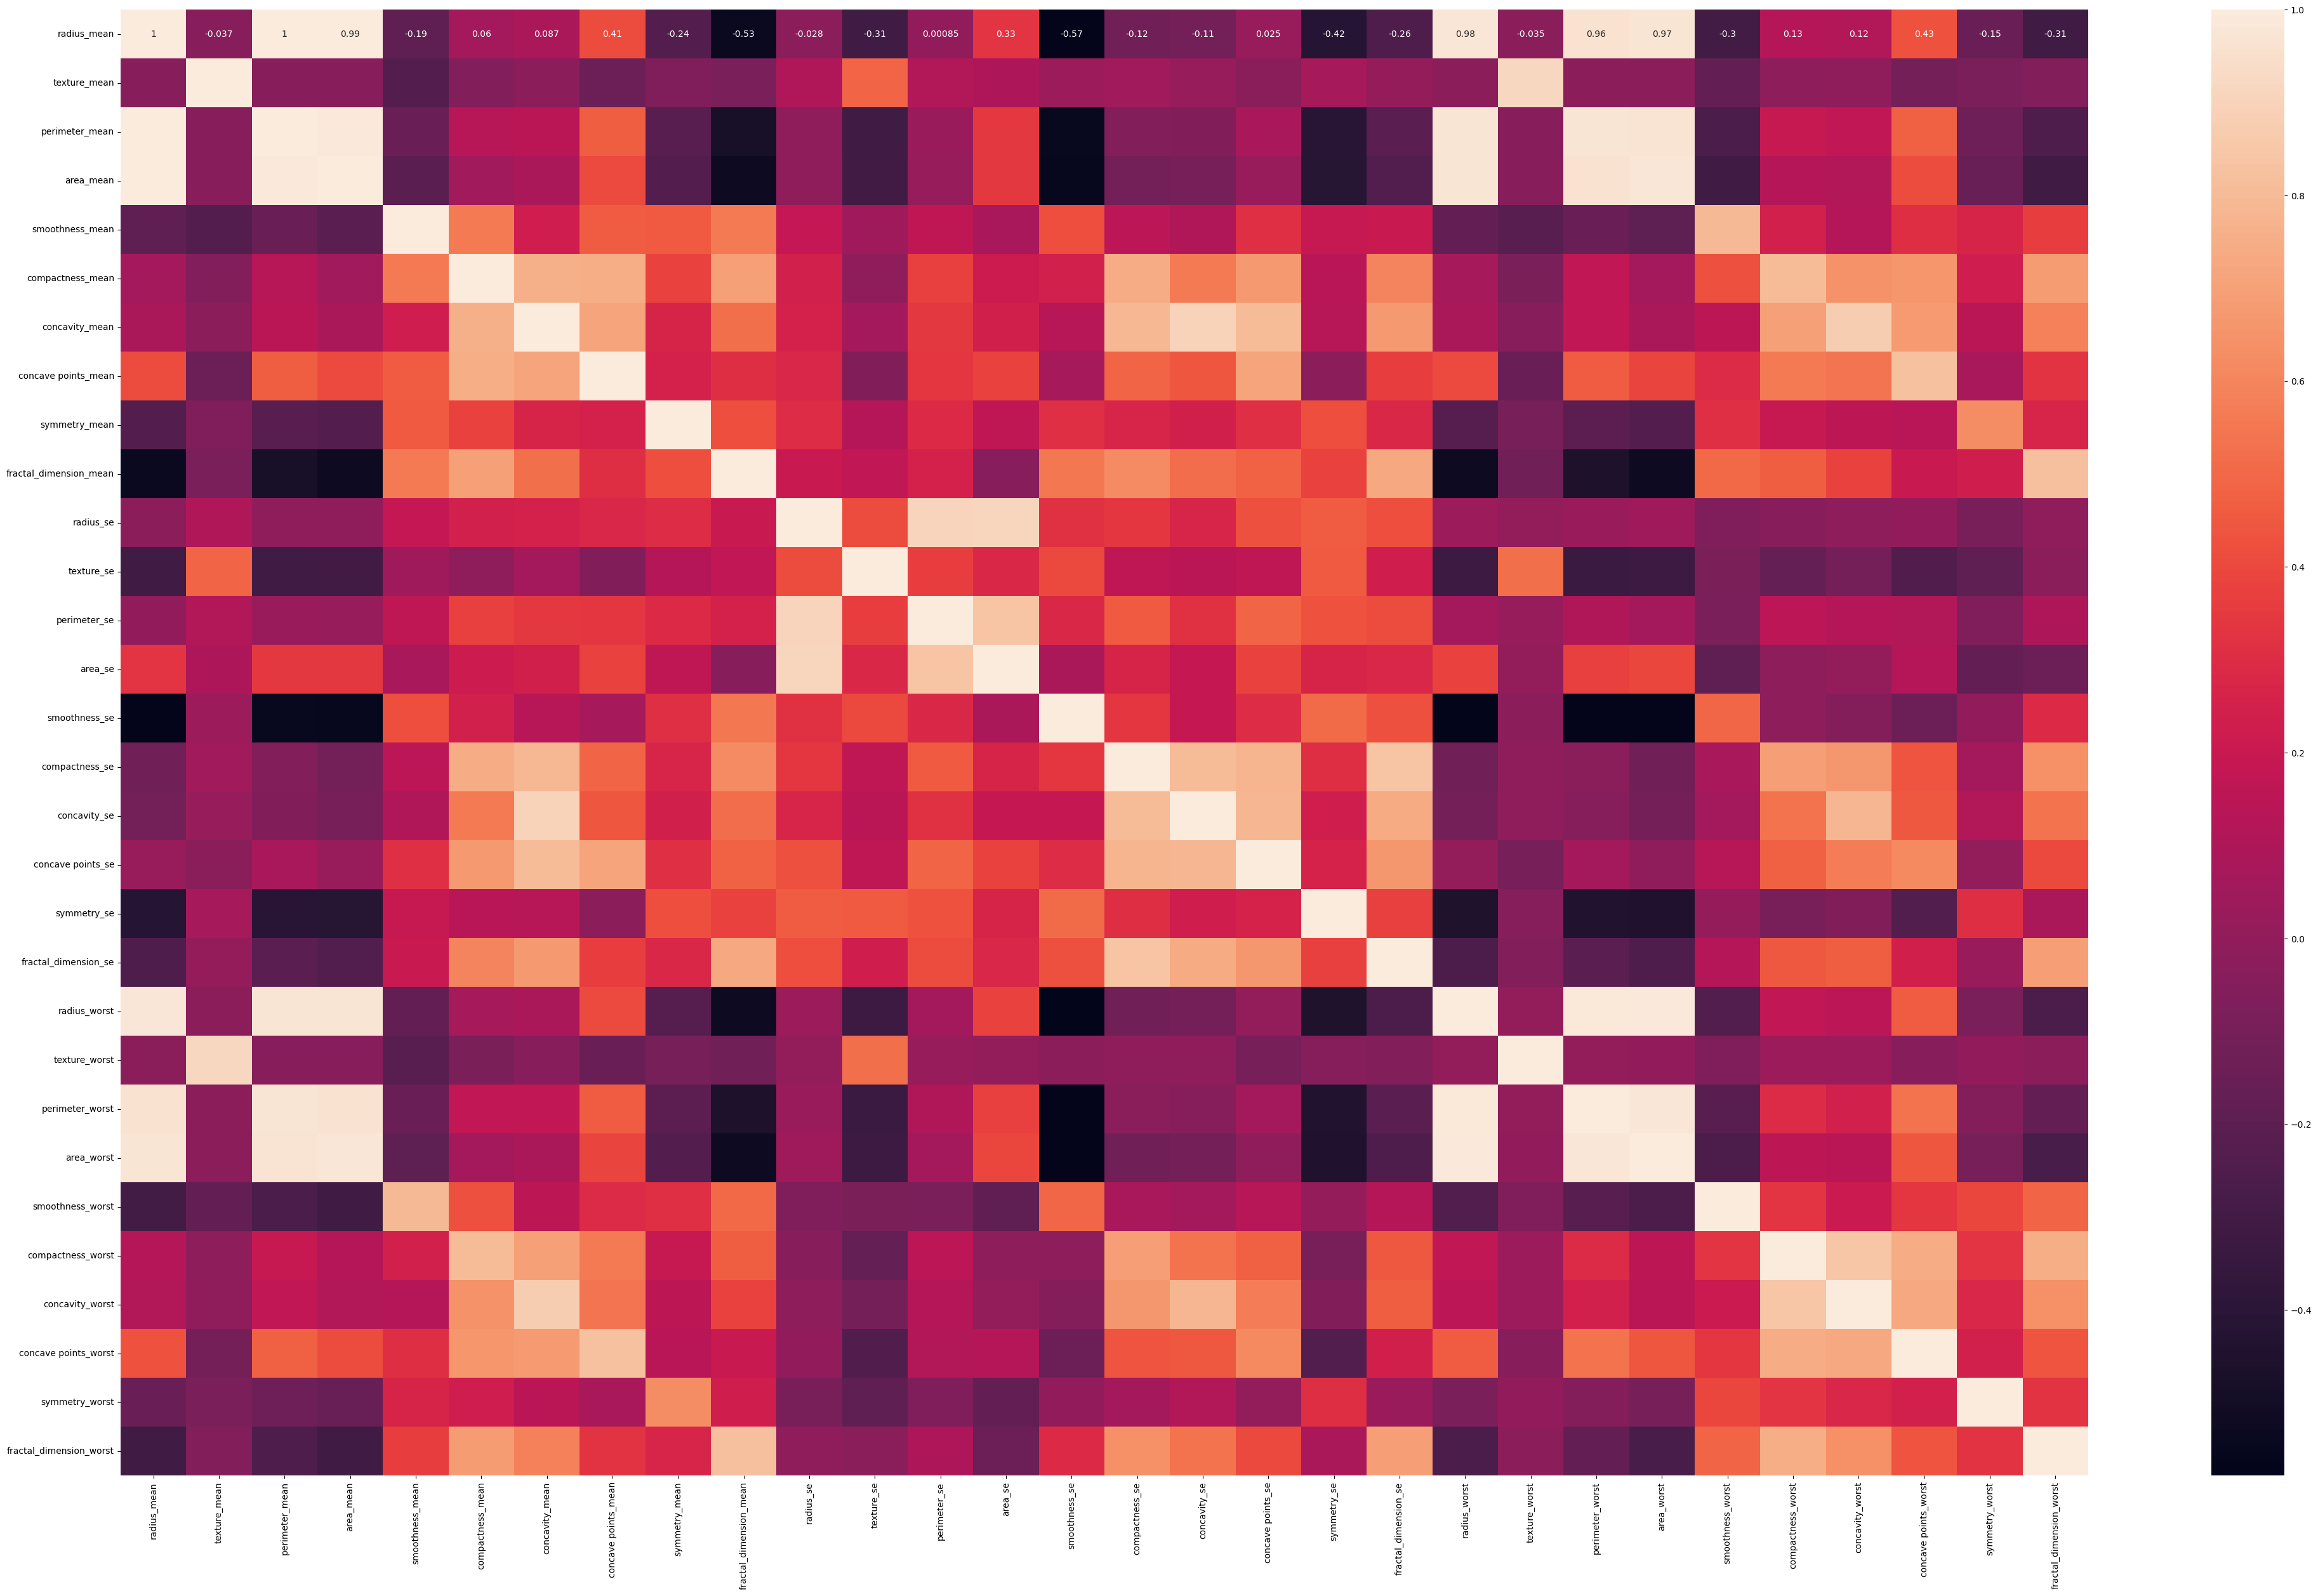

In [17]:
plt.figure(figsize=(50,30))
sns.heatmap(b_df.corr(), annot=True)

You can see here that the radius metrics are highly correlated with the perimter_mean and area_mean (based on the radius mean). The radius_mean is also highly correlated with the radius_worst so it makes sense that all of those metrics are also highly correlated.

The radius_worst has a higher negative correlation with concavity_worst and compactness_worst for the malignant tumors vs the benign tumors. When you zoom in 

<Axes: >

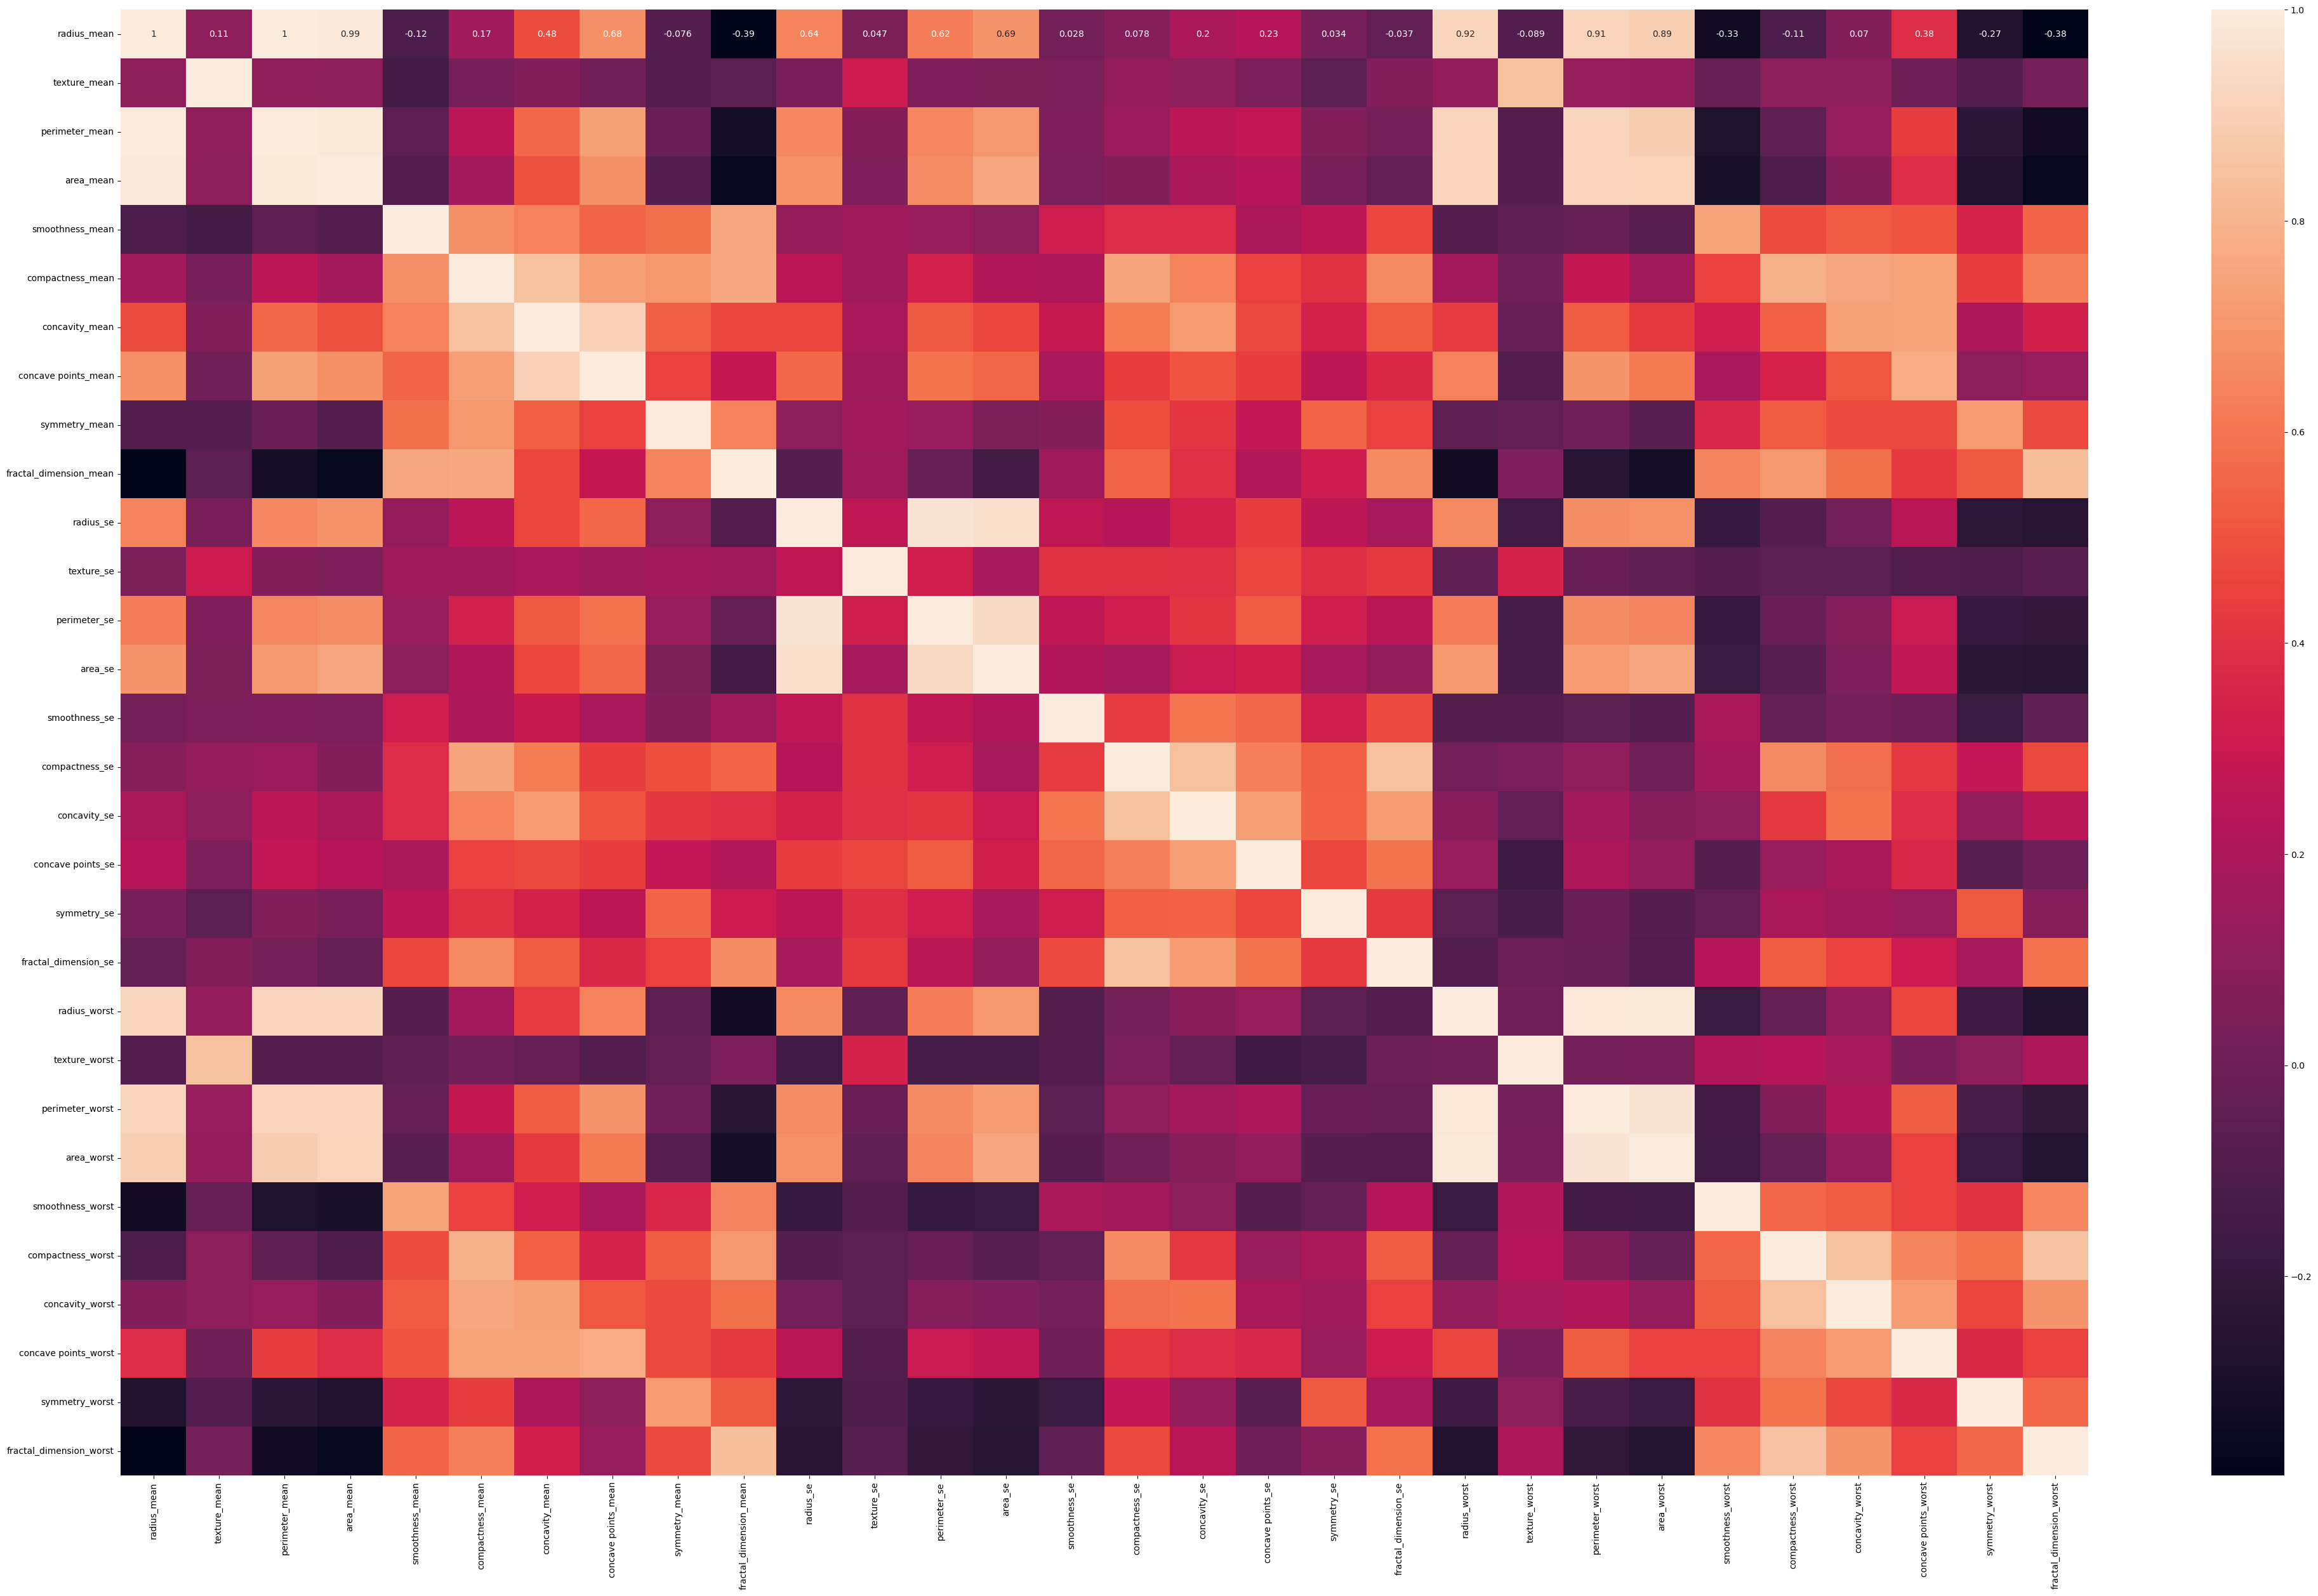

In [21]:
plt.figure(figsize=(50,30))
sns.heatmap(m_df.corr(), annot=True)

In [23]:
b_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,357.0,12.146524,1.780512,6.981000,11.080000,12.200000,13.370000,17.85000
texture_mean,357.0,17.914762,3.995125,9.710000,15.150000,17.390000,19.760000,33.81000
perimeter_mean,357.0,78.075406,11.807438,43.790000,70.870000,78.180000,86.100000,114.60000
area_mean,357.0,462.790196,134.287118,143.500000,378.200000,458.400000,551.100000,992.10000
smoothness_mean,357.0,0.092478,0.013446,0.052630,0.083060,0.090760,0.100700,0.16340
compactness_mean,357.0,0.080085,0.033750,0.019380,0.055620,0.075290,0.097550,0.22390
concavity_mean,357.0,0.046058,0.043442,0.000000,0.020310,0.037090,0.059990,0.41080
concave points_mean,357.0,0.025717,0.015909,0.000000,0.015020,0.023440,0.032510,0.08534
symmetry_mean,357.0,0.174186,0.024807,0.106000,0.158000,0.171400,0.189000,0.27430
fractal_dimension_mean,357.0,0.062867,0.006747,0.051850,0.058530,0.061540,0.065760,0.09575


In [25]:
m_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,212.0,17.462830,3.203971,10.950000,15.075000,17.325000,19.590000,28.11000
texture_mean,212.0,21.604906,3.779470,10.380000,19.327500,21.460000,23.765000,39.28000
perimeter_mean,212.0,115.365377,21.854653,71.900000,98.745000,114.200000,129.925000,188.50000
area_mean,212.0,978.376415,367.937978,361.600000,705.300000,932.000000,1203.750000,2501.00000
smoothness_mean,212.0,0.102898,0.012608,0.073710,0.094010,0.102200,0.110925,0.14470
compactness_mean,212.0,0.145188,0.053987,0.046050,0.109600,0.132350,0.172400,0.34540
concavity_mean,212.0,0.160775,0.075019,0.023980,0.109525,0.151350,0.203050,0.42680
concave points_mean,212.0,0.087990,0.034374,0.020310,0.064620,0.086280,0.103175,0.20120
symmetry_mean,212.0,0.192909,0.027638,0.130800,0.174050,0.189900,0.209850,0.30400
fractal_dimension_mean,212.0,0.062680,0.007573,0.049960,0.056598,0.061575,0.067075,0.09744


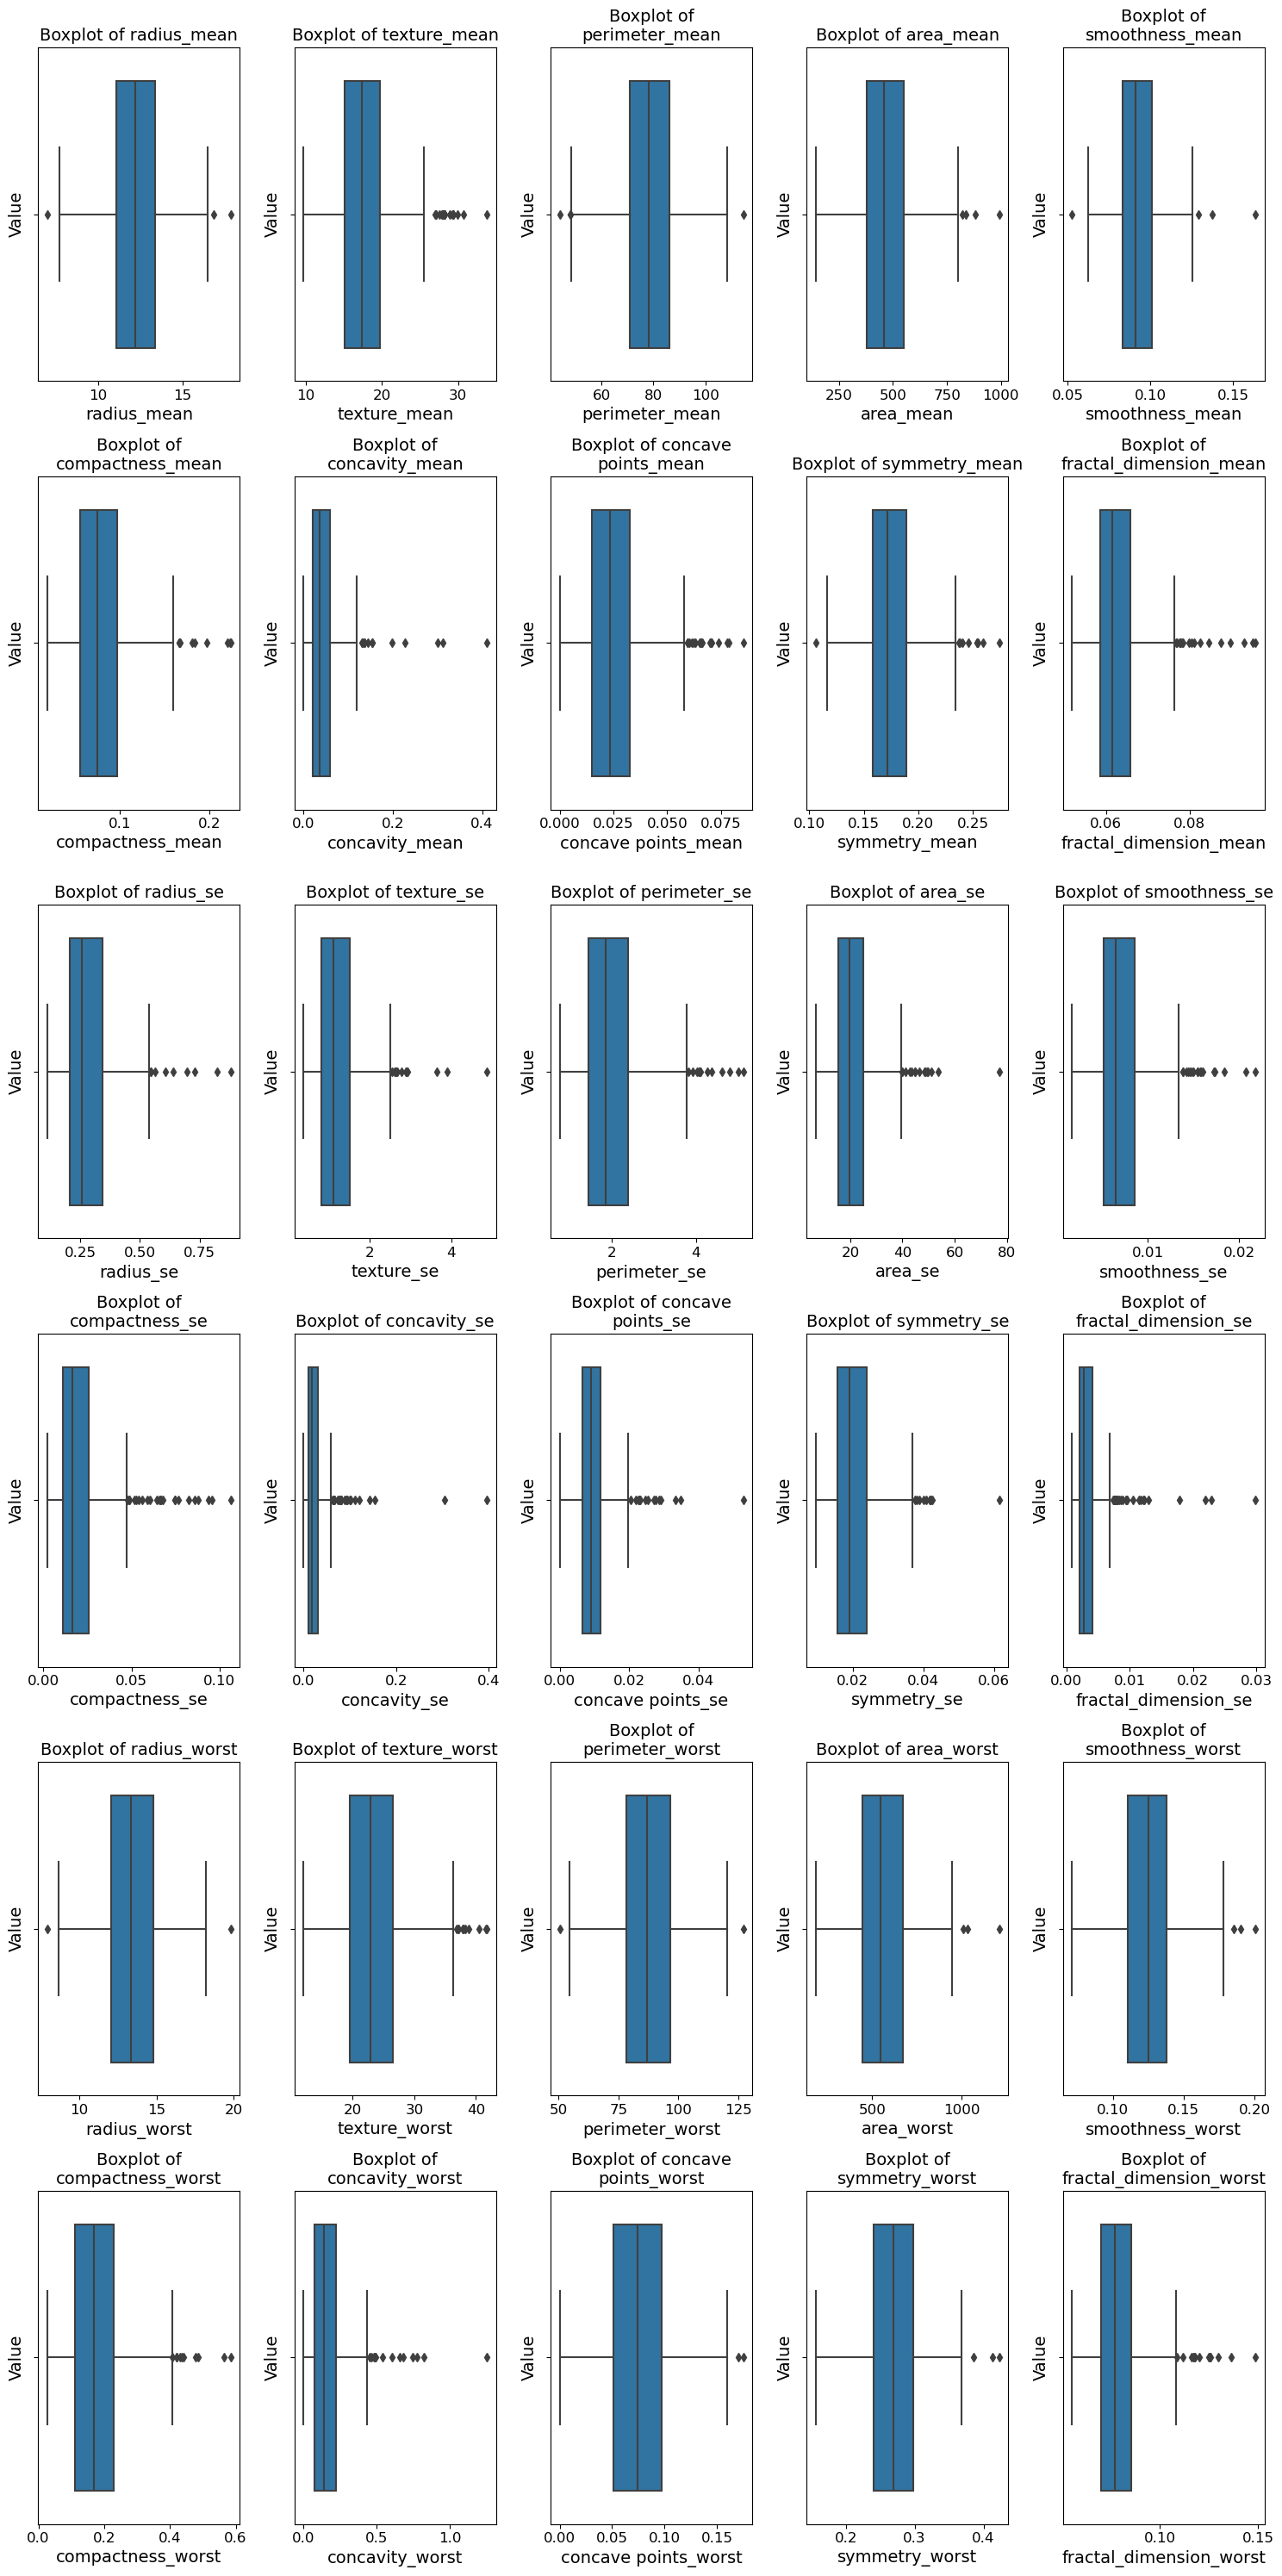

In [27]:
import textwrap

n_cols = 5
n_rows = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() 

# Loop through each column and plot a boxplot
for i, col in enumerate(b_df.columns):
    sns.boxplot(x=b_df[col], ax=axes[i])
    title = f'Boxplot of {col}'

    wrapped_title = textwrap.fill(title, width=24)  # Wrap title after 24 characters
    axes[i].set_title(wrapped_title, fontsize=14)

    # Set x-axis and y-axis labels font size (if necessary)
    axes[i].set_xlabel(col, fontsize=14)  # Set the x-axis label size
    axes[i].set_ylabel('Value', fontsize=14)  # Set the y-axis label size
    
    # Set tick label font size
    axes[i].tick_params(axis='x', labelsize=12)  # x-axis tick labels font size
    axes[i].tick_params(axis='y', labelsize=12)  # y-axis tick labels font size

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

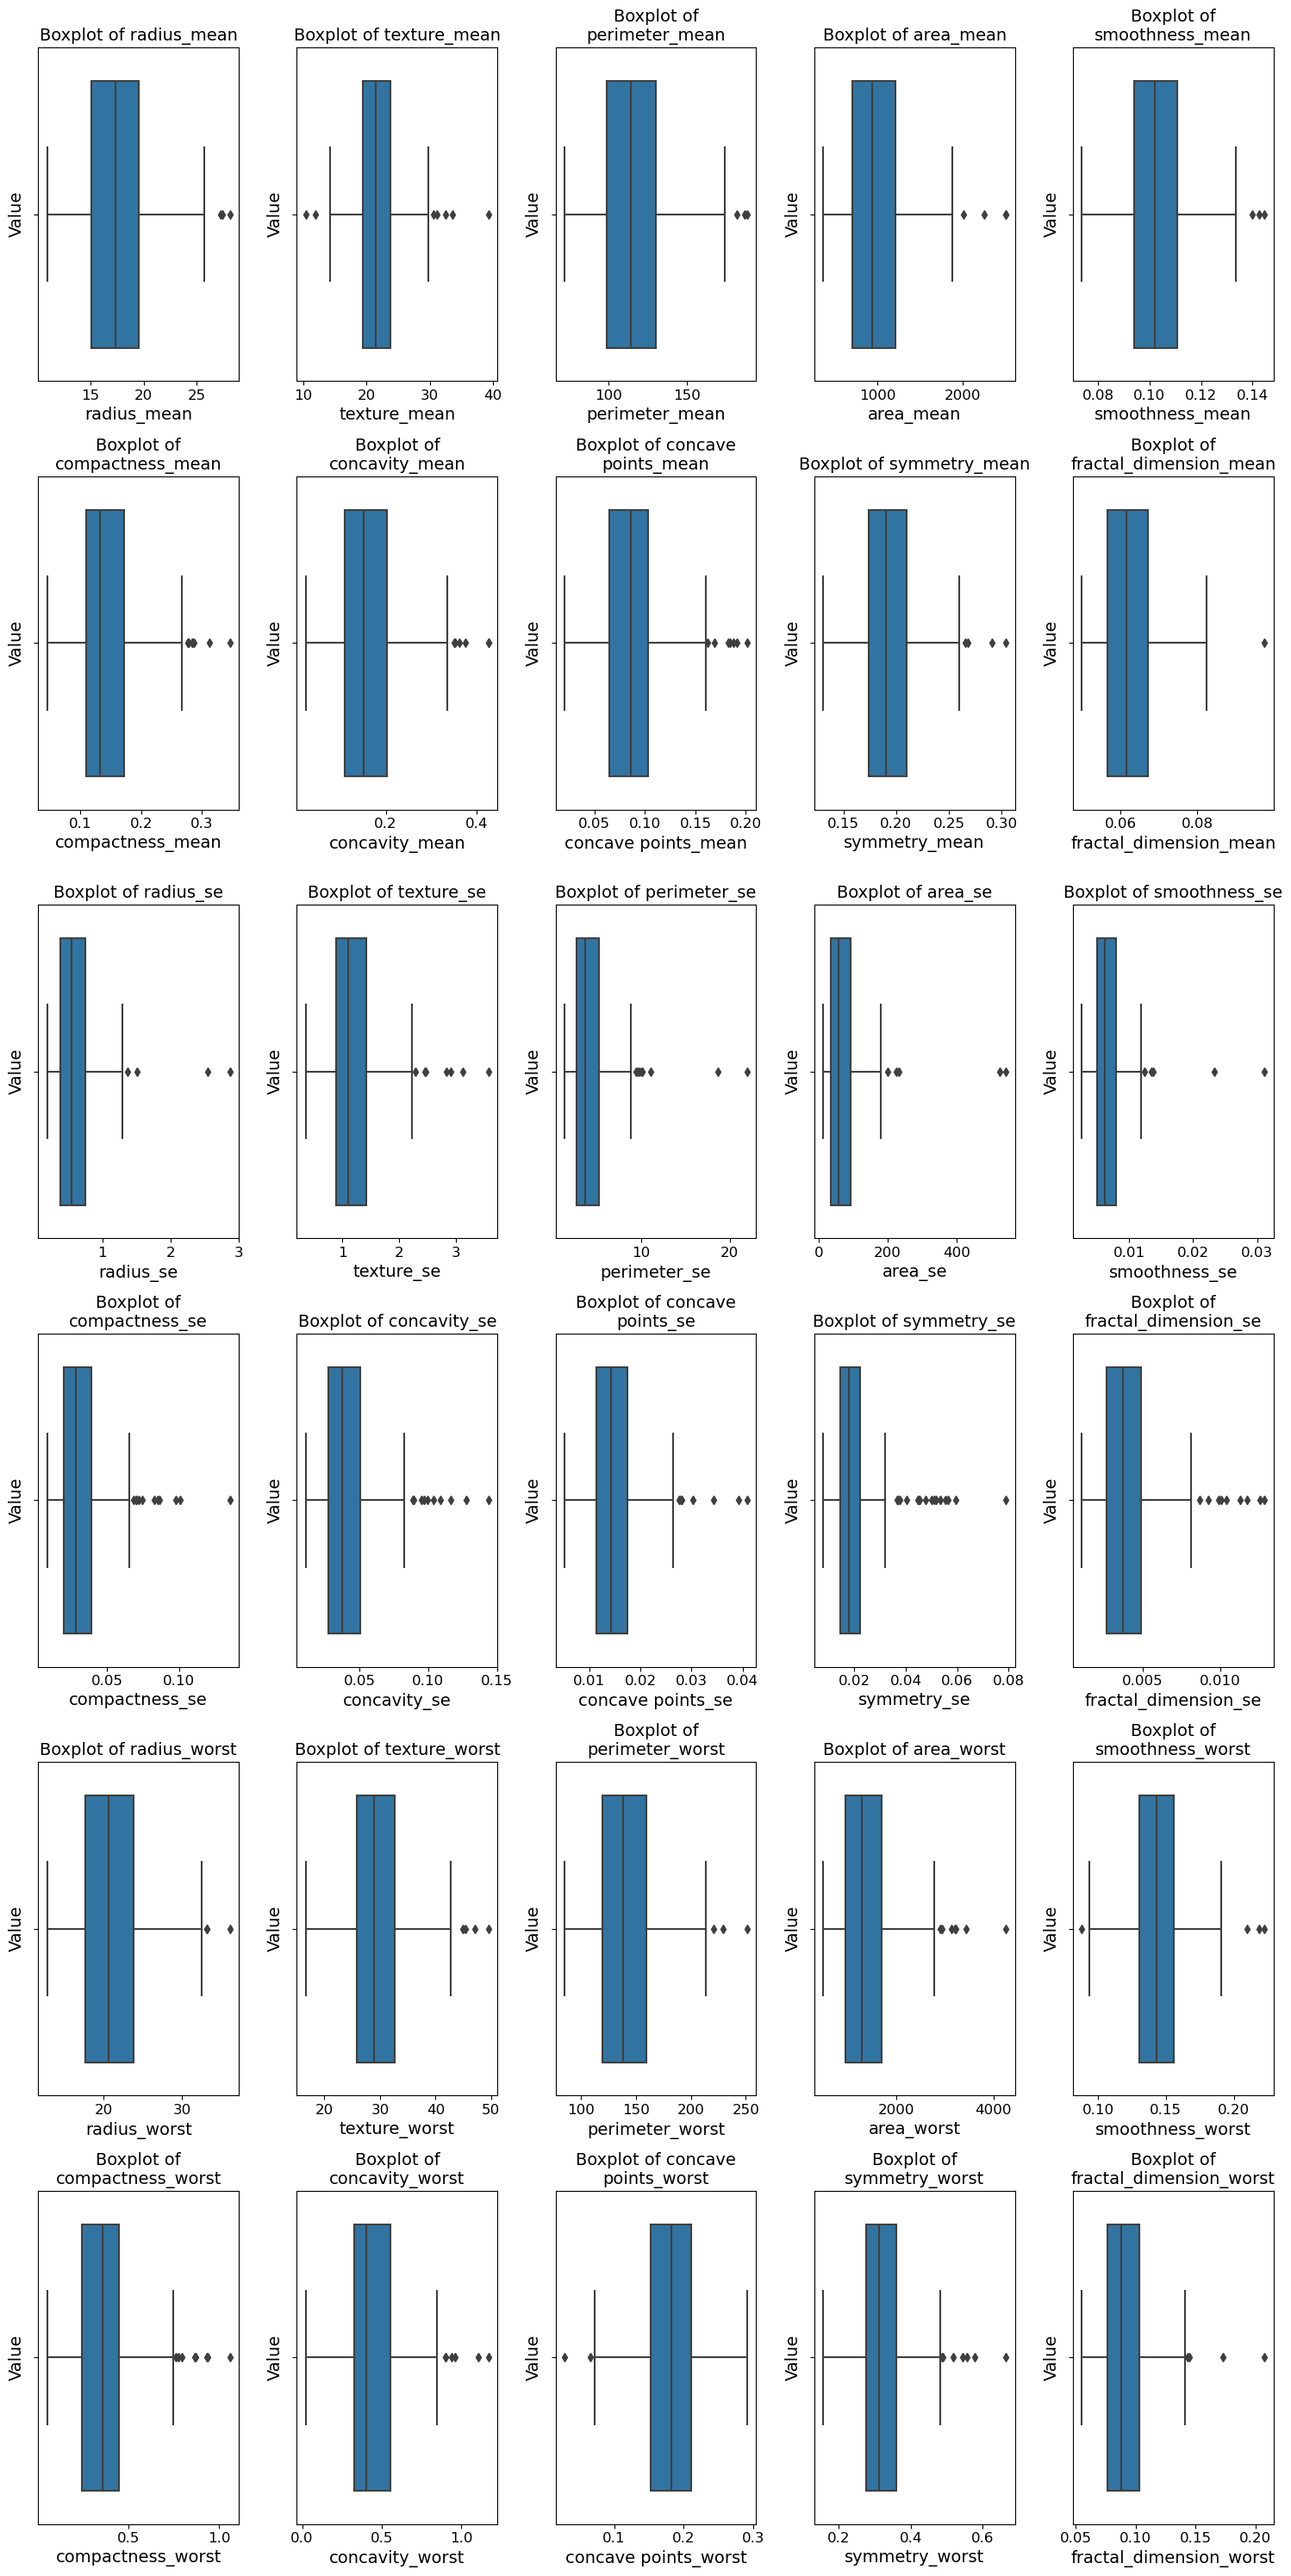

In [29]:
n_cols = 5
n_rows = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() 

# Loop through each column and plot a boxplot
for i, col in enumerate(m_df.columns):
    sns.boxplot(x=m_df[col], ax=axes[i])
    title = f'Boxplot of {col}'

    wrapped_title = textwrap.fill(title, width=24)  # Wrap title after 24 characters
    axes[i].set_title(wrapped_title, fontsize=14)

    # Set x-axis and y-axis labels font size (if necessary)
    axes[i].set_xlabel(col, fontsize=14)  # Set the x-axis label size
    axes[i].set_ylabel('Value', fontsize=14)  # Set the y-axis label size
    
    # Set tick label font size
    axes[i].tick_params(axis='x', labelsize=12)  # x-axis tick labels font size
    axes[i].tick_params(axis='y', labelsize=12)  # y-axis tick labels font size

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

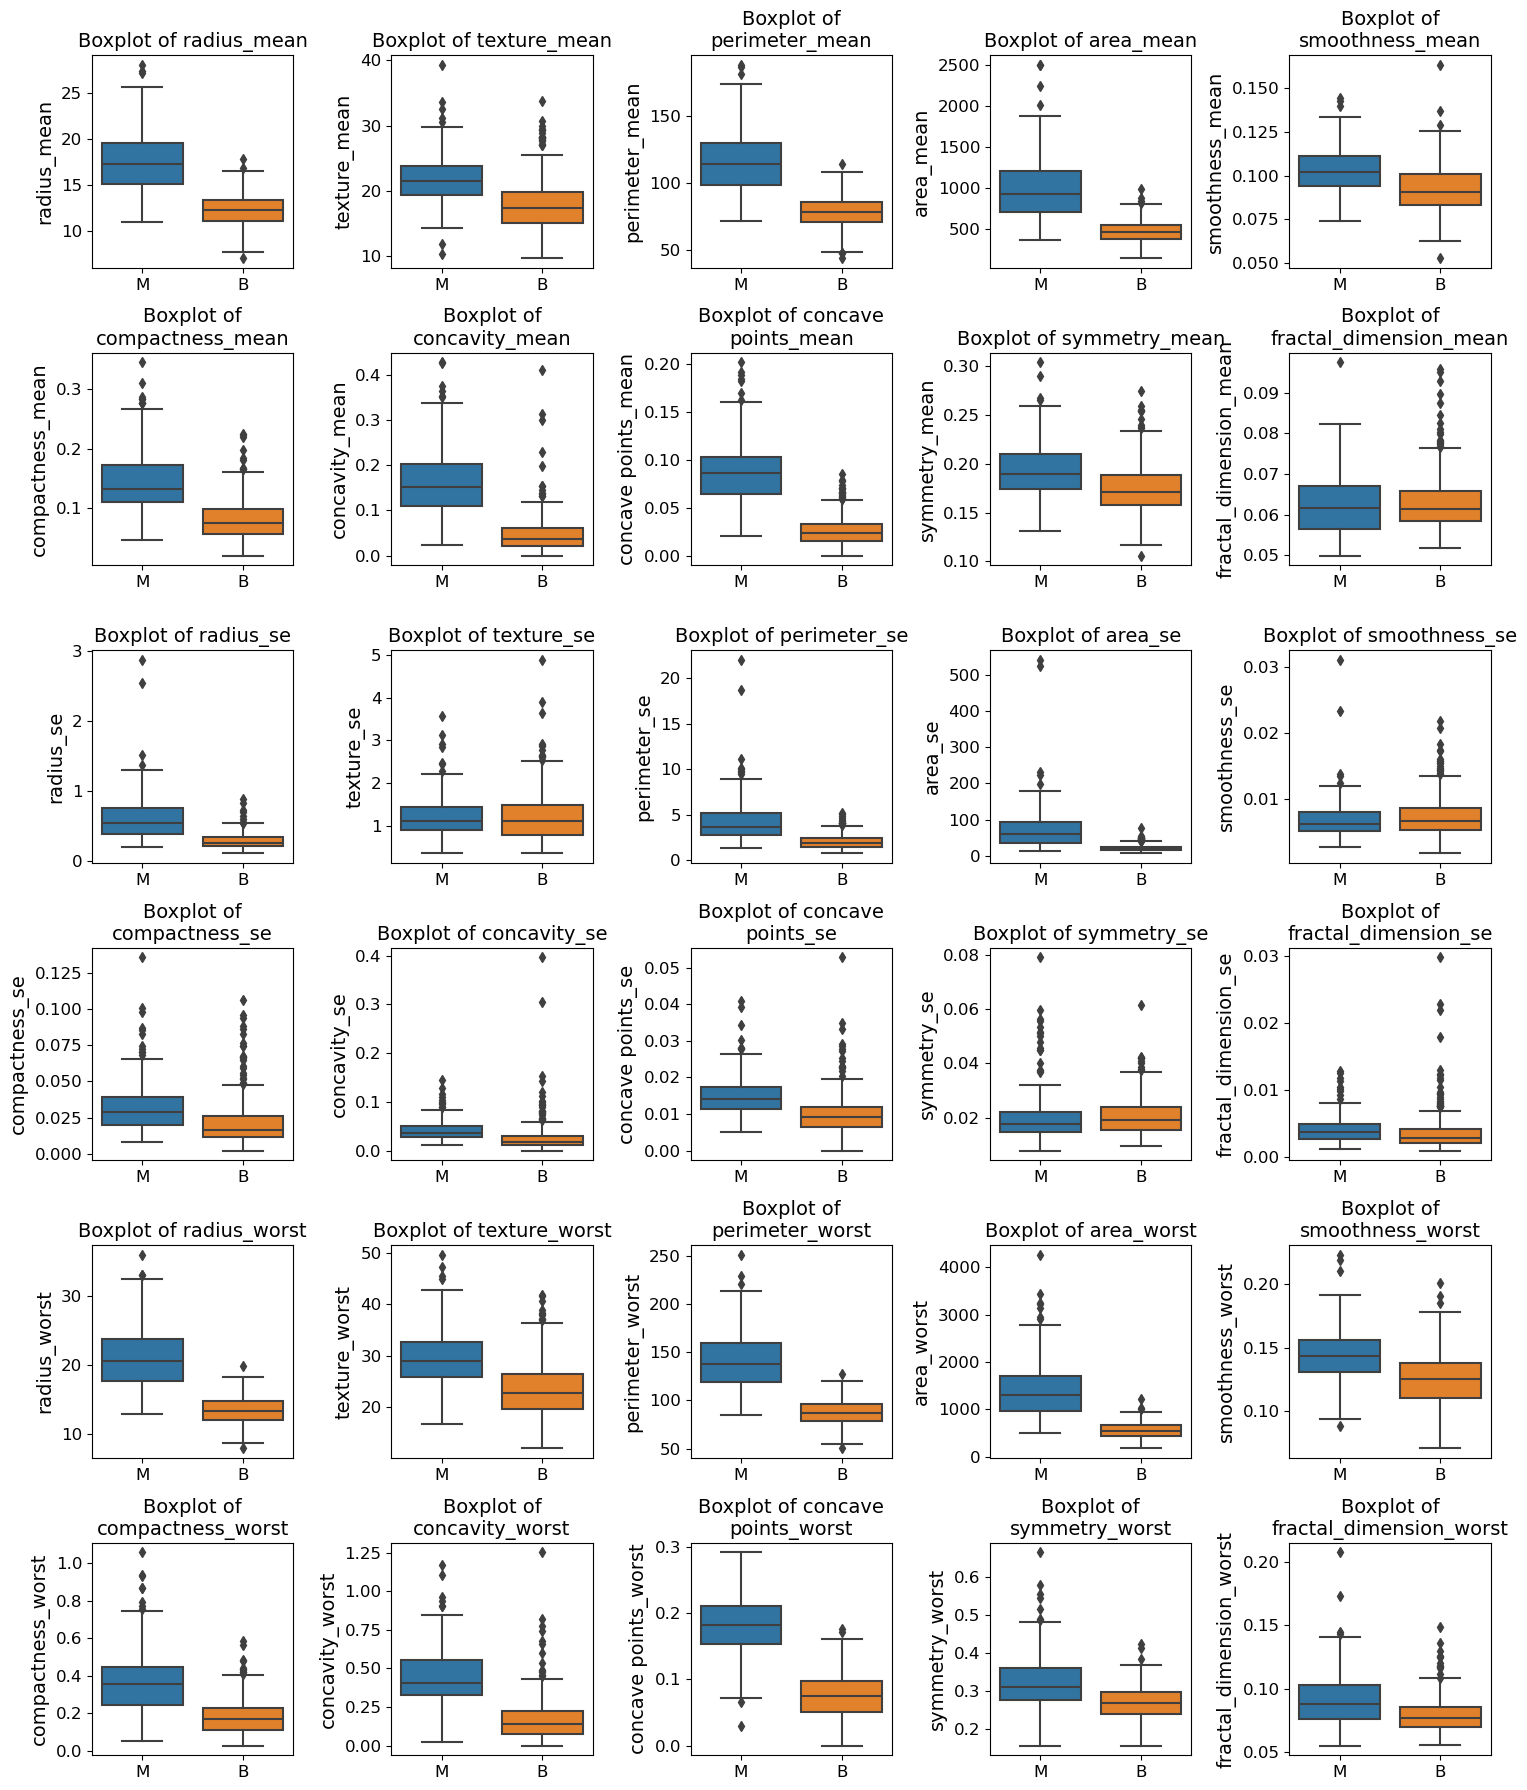

In [31]:
# Define the number of rows and columns for subplots based on 30 metrics
n_cols = 5  # Number of columns for the subplots grid
n_rows = 6  # Number of rows for the subplots grid (to fit 30 metrics)

# Create the figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 18))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each of the 30 numerical columns and create boxplots
for i, col in enumerate(bc_data.columns[1:]):  # Exclude the first column ('diagnosis')
    sns.boxplot(x='diagnosis', y=col, data=bc_data, ax=axes[i])  # Create boxplot for each numerical column
    title = f'Boxplot of {col}'
    wrapped_title = textwrap.fill(title, width=24)  # Wrap title after 24 characters
    axes[i].set_title(wrapped_title, fontsize=14)

       # Set x-axis and y-axis labels font size (if necessary)
    axes[i].set_xlabel('', fontsize=14)  # Set the x-axis label size
    axes[i].set_ylabel(col, fontsize=14)  # Set the y-axis label size
    
    # Set tick label font size
    axes[i].tick_params(axis='x', labelsize=12)  # x-axis tick labels font size
    axes[i].tick_params(axis='y', labelsize=12)  # y-axis tick labels font size
    
plt.tight_layout()

# Show the plot
plt.show()

You can observe that the standard error (SE) metrics, which all end in _se, show significant outliers across various categories. Sometimes, the outliers appear in the benign tumors, and other times in the malignant tumors. This makes sense because both benign and malignant tumors exhibit a wide range of values across different features, which can lead to outliers in the standard error calculations as well.

What this suggests is that even though the mean values show some outliers, the fact that the standard error also displays outliers in similar variables is important. This implies that the presence of outliers is inherent to the data itself, and removing rows based on the presence of outliers in the mean variables may not be necessary or justified.

If, however, the standard error did not show high outliers in the same variables, I would consider looking more closely at whether to drop the rows with extreme outliers in the mean variables. The fact that outliers appear consistently across both the mean and the standard error metrics indicates that these outliers may be part of the natural variability in the data rather than data errors.

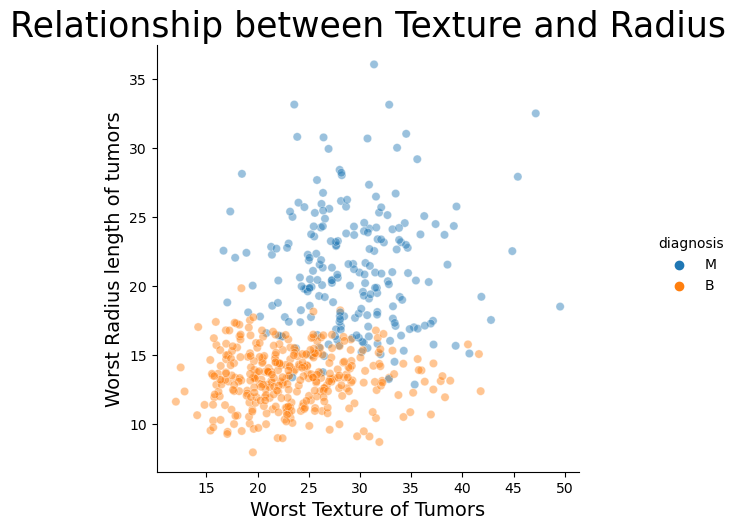

<Figure size 2000x2500 with 0 Axes>

In [34]:
sns.relplot(data = bc_data, x='texture_worst', y='radius_worst', kind='scatter', hue='diagnosis', alpha=0.45)
plt.xlabel("Worst Texture of Tumors", fontsize=14)
plt.ylabel("Worst Radius length of tumors", fontsize=14)
plt.title("Relationship between Texture and Radius", fontsize=25)
plt.figure(figsize=(20,25))
plt.show()

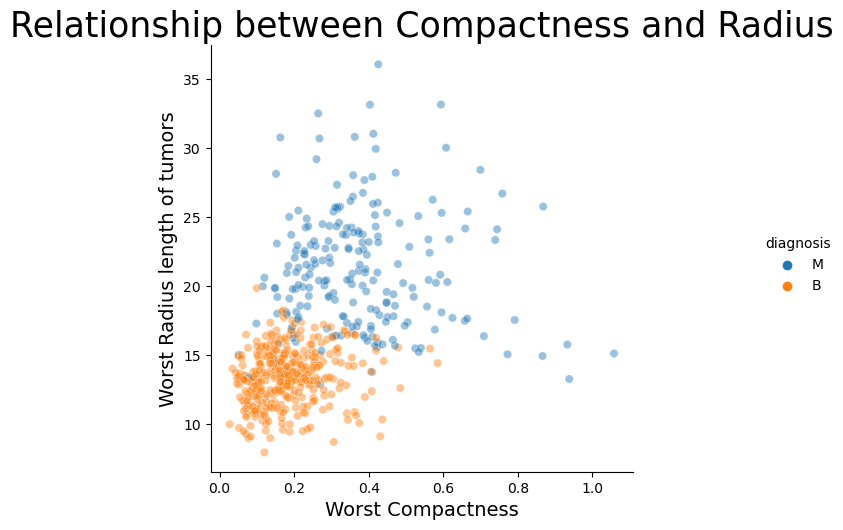

<Figure size 2000x2500 with 0 Axes>

In [36]:
sns.relplot(data = bc_data, x='compactness_worst', y='radius_worst', kind='scatter', hue='diagnosis', alpha=0.45)
plt.xlabel("Worst Compactness", fontsize=14)
plt.ylabel("Worst Radius length of tumors", fontsize=14)
plt.title("Relationship between Compactness and Radius", fontsize=25)
plt.figure(figsize=(20,25))
plt.show()

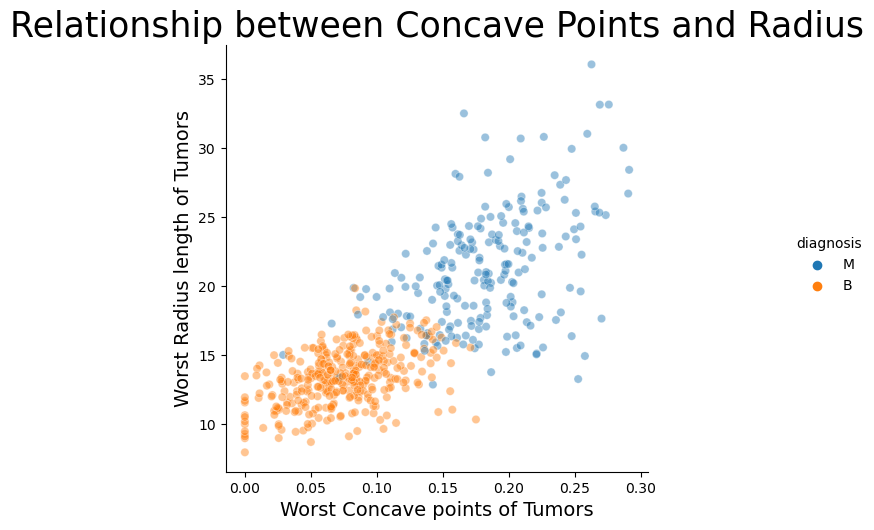

<Figure size 2000x2500 with 0 Axes>

In [38]:
sns.relplot(data = bc_data, x='concave points_worst', y='radius_worst', kind='scatter', hue='diagnosis', alpha=0.45)
plt.xlabel("Worst Concave points of Tumors", fontsize=14)
plt.ylabel("Worst Radius length of Tumors", fontsize=14)
plt.title("Relationship between Concave Points and Radius", fontsize=25)
plt.figure(figsize=(20,25))
plt.show()

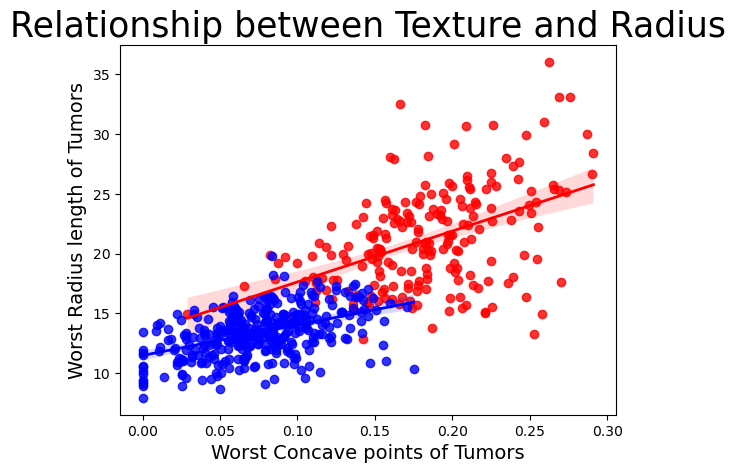

<Figure size 2000x2500 with 0 Axes>

In [40]:
#Plot for Malignant
sns.regplot(y="radius_worst", x="concave points_worst", data=m_df, fit_reg = True, scatter_kws={'color':'red'}, line_kws={'color':'red', 'lw':2}, label='Malignant')

#Plot for Benign
sns.regplot(y="radius_worst", x="concave points_worst", data=b_df, fit_reg = True, scatter_kws={'color':'blue'}, line_kws={'color':'blue', 'lw':2}, label='Benign')

plt.xlabel("Worst Concave points of Tumors", fontsize=14)
plt.ylabel("Worst Radius length of Tumors", fontsize=14)
plt.title("Relationship between Texture and Radius", fontsize=25)
plt.figure(figsize=(20,25))
plt.show()

In [42]:
# Spliting target variable and independent variables
x = m_df[['concave points_worst']]
y = m_df[['radius_worst']]

In [44]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("Size of training set:", x_train.shape)
print("Size of training set:", x_test.shape)

Size of training set: (148, 1)
Size of training set: (64, 1)


In [46]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression()

In [48]:
# We now want to train the model on our test data.
rModel.fit(x_train, y_train)

LinearRegression()

In [50]:
# Evaluate the model  
print(rModel.score(x_train, y_train))

0.2046952951177573


In [52]:
# Spliting target variable and independent variables
x = b_df[['concave points_worst']]
y = b_df[['radius_worst']]

In [54]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("Size of training set:", x_train.shape)
print("Size of training set:", x_test.shape)

Size of training set: (249, 1)
Size of training set: (108, 1)


In [56]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression()

In [58]:
# We now want to train the model on our test data.
rModel.fit(x_train, y_train)

LinearRegression()

In [60]:
# Evaluate the model  
print(rModel.score(x_train, y_train))

0.18243460327366579


In [62]:
# Import regression modules
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [64]:
m_df = m_df.rename(columns={'concave points_worst': 'concave_points_worst'})
b_df = b_df.rename(columns={'concave points_worst': 'concave_points_worst'})
bc_data = bc_data.rename(columns={'concave points_worst': 'concave_points_worst'})

In [66]:
# statsmodels works nicely with pandas dataframes
m = smf.ols('radius_worst ~ concave_points_worst',m_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           radius_worst   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     56.44
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.64e-12
Time:                        22:15:46   Log-Likelihood:                -583.50
No. Observations:                 212   AIC:                             1171.
Df Residuals:                     210   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               13.3761 

In [68]:
from sklearn.preprocessing import LabelEncoder
#Convert 'diagnosis' to numeric values (0 for 'B' and 1 for 'M')
label_encoder = LabelEncoder()
bc_data['diagnosis_numeric'] = label_encoder.fit_transform(bc_data['diagnosis'])

In [70]:
#Prepare the features (independent variables)
X = bc_data[['radius_worst', 'compactness_worst', 'concave_points_worst']]  # Example features

#Define the target variable (dependent variable)
y = bc_data['diagnosis_numeric']

In [72]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
#Import LogisticRegression from sklearn.linear_model and create model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
#Make predictions
y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


Here a logistic regression model was much more accurate than the linear regression models. The linear regression models all had significantly low correlations for fitting the data (around 20-23%) where as a logistic regression model had an accuracy of 96%.  There is still more work to be done to see if another model would fit this data better. We'll come back to these again to revisit what model might be the best fit for the data. 

In [83]:
#Prepare the features (independent variables)
X = bc_data[['radius_mean', 'compactness_mean', 'concave points_mean']]

#Define the target variable (dependent variable)
y = bc_data['diagnosis_numeric']

In [85]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [89]:
#Make predictions
y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


The logistic regression has a lower fit for the mean values of the data compared to the worst values in the data set.  That might be the variables I chose to represent in the model and there might be a better fit with other variables, but again it still has a much higher predictive accuracy than the linear fits from earlier. 